# Stock BTC (Bitcoin) vs ETH (Ethereum)

Installation and import of required modules.

In [1]:
!pip install yfinance==0.1.67
!pip install bs4
!pip install plotly==5.3.1

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = 10,6
import warnings
warnings.filterwarnings('ignore')

---

## Bitcoin (BTC)

To find stock information there is a special module in Pandas - Yahoo!finance. \
With its help we can collect online financial data from Yahoo!, we can get the needed historical information about the stock prices and volumes.\
Bitcoin's ticker is BTC-USD.

In [3]:
BTC = yf.Ticker("BTC-USD")
BTC_data = BTC.history(period = "max")

In [4]:
BTC_data.reset_index(inplace=True)

In [5]:
BTC_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,0,0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,0,0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,0,0
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,0,0
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0,0


In [6]:
# renaming columns
BTC_data.columns = ['Date', 'Open_BTC', 'High_BTC', 'Low_BTC', 'Close_BTC', 'Volume_BTC', 'Dividends_BTC', \
                    'Stock_Splits_BTC' ]

In [7]:
BTC_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3154 entries, 0 to 3153
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              3154 non-null   datetime64[ns]
 1   Open_BTC          3154 non-null   float64       
 2   High_BTC          3154 non-null   float64       
 3   Low_BTC           3154 non-null   float64       
 4   Close_BTC         3154 non-null   float64       
 5   Volume_BTC        3154 non-null   int64         
 6   Dividends_BTC     3154 non-null   int64         
 7   Stock_Splits_BTC  3154 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(3)
memory usage: 197.2 KB


In [8]:
# Checking if the dataset has an empty cells, NaN values.
BTC_data.isna().sum()

Date                0
Open_BTC            0
High_BTC            0
Low_BTC             0
Close_BTC           0
Volume_BTC          0
Dividends_BTC       0
Stock_Splits_BTC    0
dtype: int64

In [9]:
BTC_data.describe()

,Open_BTC,High_BTC,Low_BTC,Close_BTC,Volume_BTC,Dividends_BTC,Stock_Splits_BTC
count,3154.000000,3154.000000,3154.000000,3154.000000,3.154000e+03,3154.0,3154.0
mean,13322.909886,13653.920159,12959.808795,13330.630759,1.661504e+10,0.0,0.0
std,16044.387651,16451.223113,15578.715047,16041.956505,1.970171e+10,0.0,0.0
min,176.897003,211.731003,171.509995,178.102997,5.914570e+06,0.0,0.0
25%,735.548508,741.667236,719.045227,735.656250,1.165078e+08,0.0,0.0
50%,7422.154541,7592.310791,7278.086670,7427.008545,9.383733e+09,0.0,0.0
75%,19286.165039,19583.391602,18957.999023,19295.388184,2.791023e+10,0.0,0.0
max,67549.734375,68789.625000,66382.062500,67566.828125,3.509679e+11,0.0,0.0


We can see here the main characterictics of the dataset. \
It has all prices of Bitcoin from 17 September 2014 till 4 days of the present date.\
The dataset has Bitcoin's data - open and close, high and low prices, volumes of traded stock.\
For given perion, minimum close price was 178.1 USD, maximum price - 67566.8 USD.
The price was risen in 379 times!

In [10]:
print('Amount of traded volume of BTC total - ', BTC_data.Volume_BTC.sum()/1000000000000, 'trillion')

Amount of traded volume of BTC total -  52.403839288419 trillion


Let's add column 'Year', so we'll be able to group BTC traded volume by year.

In [11]:
BTC_data['Year'] = BTC_data['Date'].dt.year
BTC_volume = BTC_data[['Volume_BTC', 'Year']]
BTC_gr_vol=BTC_volume.groupby('Year', axis=0).sum()

In [12]:
# Volume traded, in billions
BTC_gr_vol/1000000000

,Volume_BTC
Year,
2014,2.526711
2015,12.375532
2016,31.448371
2017,869.746421
2018,2213.196541
2019,6106.628279
2020,12086.518389
2021,17211.845902
2022,10954.842244


Let's visualize the received data.

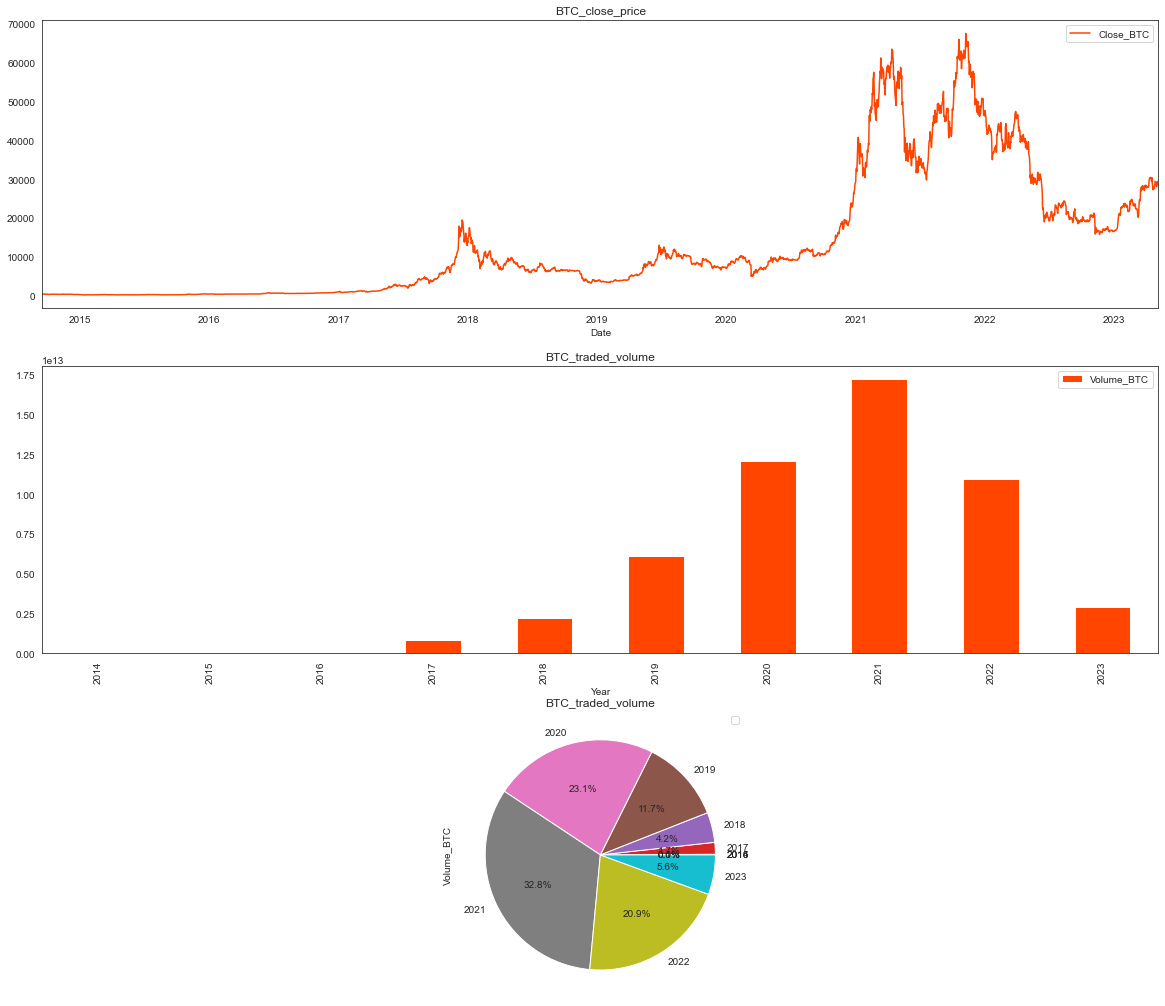

In [13]:
sns.set_style('white')
f, axes = plt.subplots(3, figsize=(20,18))

d1=BTC_data.plot(kind='line', x='Date', y='Close_BTC', title = 'BTC_close_price', color='orangered', ax=axes[0])
d2=BTC_gr_vol.plot(kind='bar', title = 'BTC_traded_volume', color= 'orangered', ax=axes[1])
d3=BTC_gr_vol['Volume_BTC'].plot(kind='pie', x='Year', autopct='%1.1f%%', title = 'BTC_traded_volume', ax=axes[2])
plt.legend('')
plt.show()


The first chart shows BTC close price distribution. It's obvious that the price was constantly growing with its rapid increases in the end of both - 2017 and 2020 and strong fluctuations in 2021. The mamimum price of BTC was reached in 2021 and get 67566.8 USD.\
In 2022 the price dropped significally to 15787 USD. \
The second and trird charts show amounts of BTC traded volumes. It's obvious that each year they were increasing to their max
amount in 2021 - 17.2 trillion, which is 32.9% of all. And the total amount was 52.26 trillion.

### BTC daily changes

Each day the price of BTC changes, so it will be interesting to calculate its daily percentage change.

In [14]:
# Calculate the daily percentage change of Close price
# Percentage_Change = (Current Price - Previous Price)/ Previous Price * 100
BTC_data['day_perc_change_BTC'] = BTC_data['Close_BTC'].pct_change()*100
BTC_data['day_perc_change_BTC'].dropna()
BTC_data.head()

,Date,Open_BTC,High_BTC,Low_BTC,Close_BTC,Volume_BTC,Dividends_BTC,Stock_Splits_BTC,Year,day_perc_change_BTC
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,0,0,2014,NaN
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,0,0,2014,-7.192558
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,0,0,2014,-6.984265
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,0,0,2014,3.573492
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0,0,2014,-2.465854


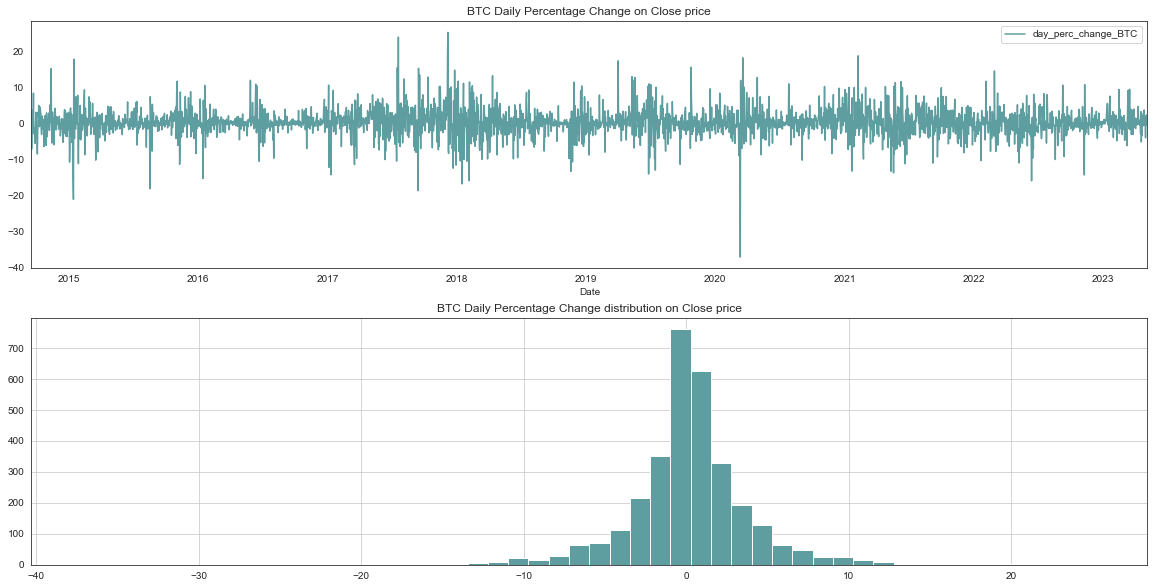

In [15]:
# Let's visualize BTC daily percentage change on close price and it's distribution.
f, axes = plt.subplots(2, figsize=(20,10))
d1=BTC_data.plot(x='Date', y='day_perc_change_BTC', title = 'BTC Daily Percentage Change on Close price',\
                 color='cadetblue', ax=axes[0])
d2=BTC_data['day_perc_change_BTC'].hist(bins=50, color='cadetblue', ax=axes[1])
plt.title('BTC Daily Percentage Change distribution on Close price')
plt.show()

These charts show how BTC close price changed each day in percentages to previous day, whether it was rising or falling.\
On the first chart we can see drastic fluctuations of daily prices in the second half of 2017, first half of 2021, maximum drop(more than 30 %) in 2020. \
On the second chart - distribution of daily changed price in percentages. 

---

## Ethereum (ETH)

In [16]:
ETH = yf.Ticker("ETH-USD")
ETH_data = ETH.history(period = 'max')
ETH_data.reset_index(inplace = True)
ETH_data.columns = ['Date', 'Open_ETH', 'High_ETH', 'Low_ETH', 'Close_ETH', 'Volume_ETH', 'Dividends_ETH', 'Stock_Splits_ETH']
ETH_data.head()

,Date,Open_ETH,High_ETH,Low_ETH,Close_ETH,Volume_ETH,Dividends_ETH,Stock_Splits_ETH
0,2017-11-09,308.644989,329.451996,307.056000,320.884003,893249984,0,0
1,2017-11-10,320.670990,324.717987,294.541992,299.252991,885985984,0,0
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,842300992,0,0
3,2017-11-12,314.690002,319.153015,298.513000,307.907990,1613479936,0,0
4,2017-11-13,307.024994,328.415009,307.024994,316.716003,1041889984,0,0


In [17]:
ETH_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2005 entries, 0 to 2004
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              2005 non-null   datetime64[ns]
 1   Open_ETH          2005 non-null   float64       
 2   High_ETH          2005 non-null   float64       
 3   Low_ETH           2005 non-null   float64       
 4   Close_ETH         2005 non-null   float64       
 5   Volume_ETH        2005 non-null   int64         
 6   Dividends_ETH     2005 non-null   int64         
 7   Stock_Splits_ETH  2005 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(3)
memory usage: 125.4 KB


In [18]:
# Checking if the dataset has an empty cells, NaN values.
ETH_data.isna().sum()

Date                0
Open_ETH            0
High_ETH            0
Low_ETH             0
Close_ETH           0
Volume_ETH          0
Dividends_ETH       0
Stock_Splits_ETH    0
dtype: int64

In [19]:
ETH_data.describe()

,Open_ETH,High_ETH,Low_ETH,Close_ETH,Volume_ETH,Dividends_ETH,Stock_Splits_ETH
count,2005.000000,2005.000000,2005.000000,2005.000000,2.005000e+03,2005.0,2005.0
mean,1163.956790,1200.262801,1123.401837,1164.544964,1.262748e+10,0.0,0.0
std,1159.294727,1194.229943,1119.191436,1158.812539,1.052049e+10,0.0,0.0
min,84.279694,85.342743,82.829887,84.308296,6.217330e+08,0.0,0.0
25%,218.647003,224.227295,212.199005,218.505005,4.846298e+09,0.0,0.0
50%,606.119019,621.173401,582.039124,607.124023,1.017041e+10,0.0,0.0
75%,1792.413818,1835.192139,1730.164795,1792.485107,1.758154e+10,0.0,0.0
max,4810.071289,4891.704590,4718.039062,4812.087402,8.448291e+10,0.0,0.0


We can see here the main characterictics of Ethereum (ETH) dataset. \
It has all prices of Ethereum from 09 November 2017 till 4 days of the present date.\
The dataset has Ethereum data - open and close, high and low prices, volumes of traded stock.\
For given perion, minimum close price was 84.3 USD, maximum price - 4812.1 USD.\
It means that for given period the price has risen in 57 times.

In [20]:
print('Amount of traded volume of ETH total - ', ETH_data.Volume_ETH.sum()/1000000000000, 'trillion')

Amount of traded volume of ETH total -  25.318098578308 trillion


In [21]:
# Add column 'Year' to group ETH traded volume by year and visualize it with bar and pie charts.
ETH_data['Year'] = ETH_data['Date'].dt.year
ETH_volume = ETH_data[['Volume_ETH', 'Year']]
ETH_gr_vol=ETH_volume.groupby('Year', axis=0).sum()

In [22]:
# Volume traded in billions
ETH_gr_vol/1000000000

,Volume_ETH
Year,
2017,106.819773
2018,831.057313
2019,2542.965161
2020,5213.771314
2021,9957.498973
2022,5586.527529
2023,1079.458514


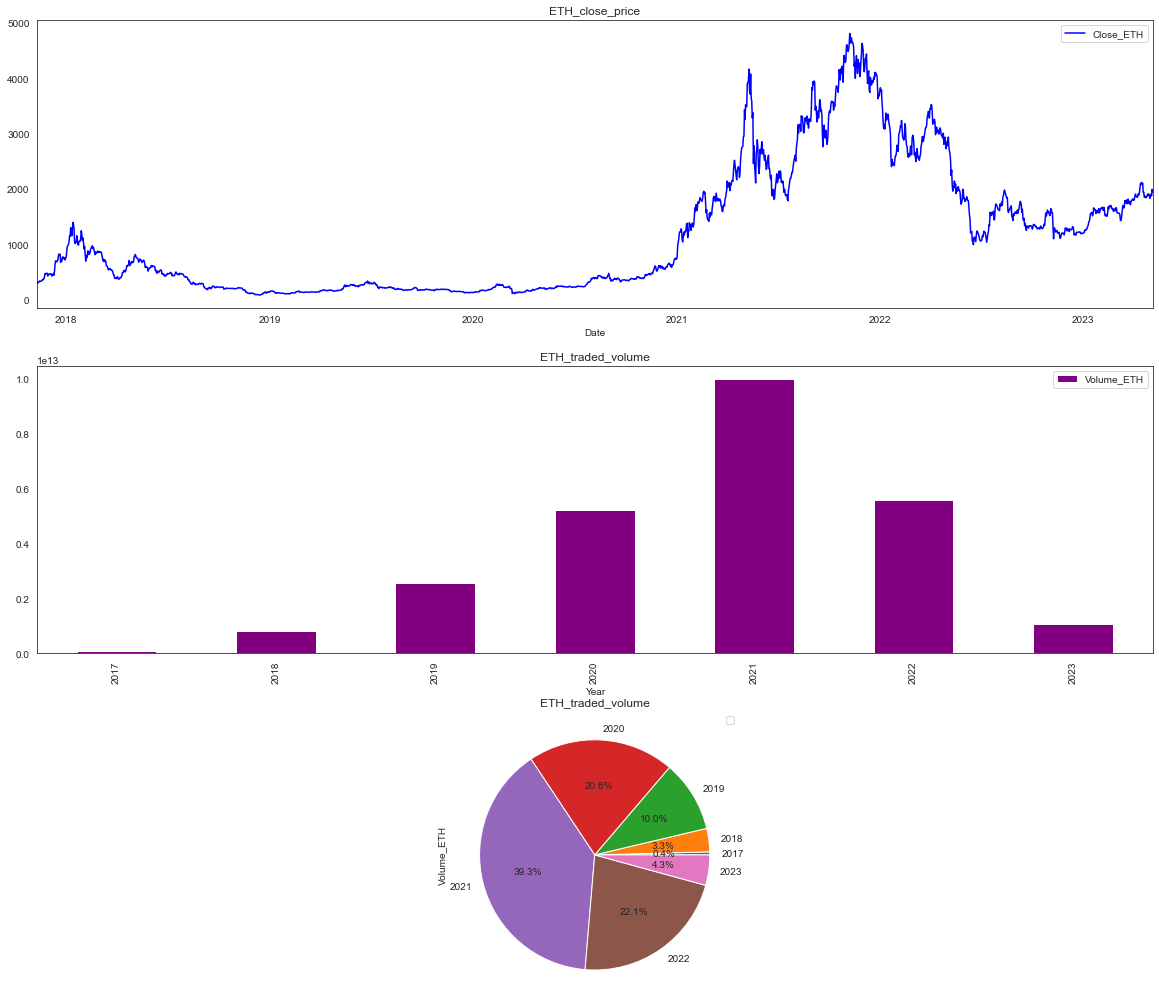

In [23]:
sns.set_style('white')
f, axes = plt.subplots(3, figsize=(20,18))

d1=ETH_data.plot(kind='line', x='Date', y='Close_ETH', title = 'ETH_close_price', color='blue', ax=axes[0])
d2=ETH_gr_vol.plot(kind='bar', title = 'ETH_traded_volume', color= 'purple', ax=axes[1])
d3=ETH_gr_vol['Volume_ETH'].plot(kind='pie', x='Year', autopct='%1.1f%%', title = 'ETH_traded_volume', ax=axes[2])

plt.legend('')
plt.show()

The first chart shows ETH close price distribution. It's obvious that the price was constantly growing with its rapid increases in the end of both - 2017, 2020, 2021 and strong fluctuations in 2021. The mamimum price of ETH was reached in 2021 and get $4812.1. Before this peak the price was always rising, but after the peak the general trend was constant decreasing. \
In 2022 the price dropped significally to 994 USD. \
The second and trird charts show amounts of Ethereum traded volumes. It's obvious that each year they were increasibg to their max amount in 2021 - 9.9 trillion, which is 39.4% of all. And the total amount was 25.2 trillion.

### ETH daily changes

In [24]:
# Calculate the daily percentage change of Close price
# Percentage_Change = (Current Price - Previous Price)/ Previous Price * 100
ETH_data['day_perc_change_ETH'] = ETH_data['Close_ETH'].pct_change()*100
ETH_data.head()

,Date,Open_ETH,High_ETH,Low_ETH,Close_ETH,Volume_ETH,Dividends_ETH,Stock_Splits_ETH,Year,day_perc_change_ETH
0,2017-11-09,308.644989,329.451996,307.056000,320.884003,893249984,0,0,2017,NaN
1,2017-11-10,320.670990,324.717987,294.541992,299.252991,885985984,0,0,2017,-6.741069
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,842300992,0,0,2017,5.155507
3,2017-11-12,314.690002,319.153015,298.513000,307.907990,1613479936,0,0,2017,-2.152342
4,2017-11-13,307.024994,328.415009,307.024994,316.716003,1041889984,0,0,2017,2.860599


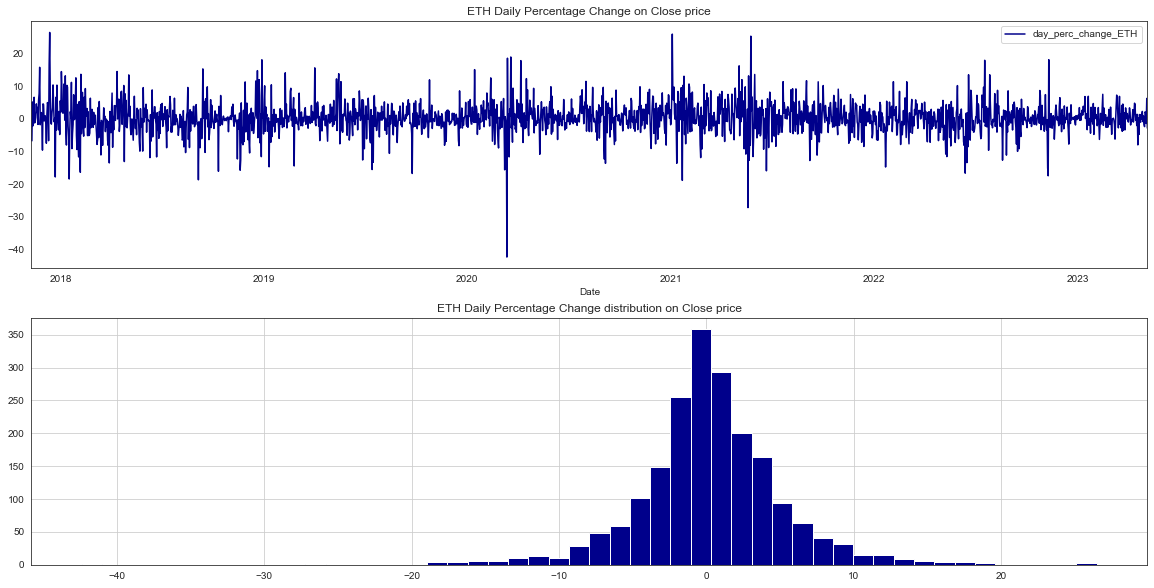

In [25]:
# Let's visualize ETH daily percentage change on close price and it's distribution.
f, axes = plt.subplots(2, figsize=(20,10))
d1=ETH_data.plot(x='Date', y='day_perc_change_ETH', title = 'ETH Daily Percentage Change on Close price', \
                 color='darkblue', ax=axes[0])
d2=ETH_data['day_perc_change_ETH'].hist(bins=50, color='darkblue', ax=axes[1])
plt.title('ETH Daily Percentage Change distribution on Close price')
plt.show()

These charts show how ETH close price changed each day in percentages to previous day, whether it was rising or falling.\
On the first chart we can see drastic fluctuations of daily prices in the end of 2017-beginning 2018, first half of 2021, maximum drop(more than 40 %) in 2020. \
On the second chart shows distribution of daily changed price in percentages. 

---

## Bitcoin (BTC) vs Ethereum (ETH)

In [26]:
# Merge both datasets, so will be able to visualize them and compare values more clearly.
BTC_ETH = BTC_data.merge(right=ETH_data, on='Date' )
BTC_ETH.drop('Year_x', axis=1, inplace=True)
BTC_ETH.head()

,Date,Open_BTC,High_BTC,Low_BTC,Close_BTC,Volume_BTC,Dividends_BTC,Stock_Splits_BTC,day_perc_change_BTC,Open_ETH,High_ETH,Low_ETH,Close_ETH,Volume_ETH,Dividends_ETH,Stock_Splits_ETH,Year_y,day_perc_change_ETH
0,2017-11-09,7446.830078,7446.830078,7101.520020,7143.580078,3226249984,0,0,-4.237574,308.644989,329.451996,307.056000,320.884003,893249984,0,0,2017,NaN
1,2017-11-10,7173.729980,7312.000000,6436.870117,6618.140137,5208249856,0,0,-7.355415,320.670990,324.717987,294.541992,299.252991,885985984,0,0,2017,-6.741069
2,2017-11-11,6618.609863,6873.149902,6204.220215,6357.600098,4908680192,0,0,-3.936756,298.585999,319.453003,298.191986,314.681000,842300992,0,0,2017,5.155507
3,2017-11-12,6295.450195,6625.049805,5519.009766,5950.069824,8957349888,0,0,-6.410128,314.690002,319.153015,298.513000,307.907990,1613479936,0,0,2017,-2.152342
4,2017-11-13,5938.250000,6811.189941,5844.290039,6559.490234,6263249920,0,0,10.242240,307.024994,328.415009,307.024994,316.716003,1041889984,0,0,2017,2.860599


In [27]:
BTC_ETH_volume = BTC_ETH[['Volume_BTC', 'Volume_ETH', 'Year_y']]
BTC_ETH_gr_vol= BTC_ETH_volume.groupby('Year_y', axis=0).sum()
BTC_ETH_gr_vol/1000000000   # volume traded in billions

,Volume_BTC,Volume_ETH
Year_y,,
2017,525.272905,106.819773
2018,2213.196541,831.057313
2019,6106.628279,2542.965161
2020,12086.518389,5213.771314
2021,17211.845902,9957.498973
2022,10954.842244,5586.527529
2023,2914.710899,1079.458514


In [28]:
print('Amount of traded volume of BTC total - ', BTC_ETH_gr_vol.Volume_BTC.sum()/1000000000000, 'trillion')
print('Amount of traded volume of ETH total - ', BTC_ETH_gr_vol.Volume_ETH.sum()/1000000000000, 'trillion')

Amount of traded volume of BTC total -  52.013015158507 trillion
Amount of traded volume of ETH total -  25.318098578308 trillion


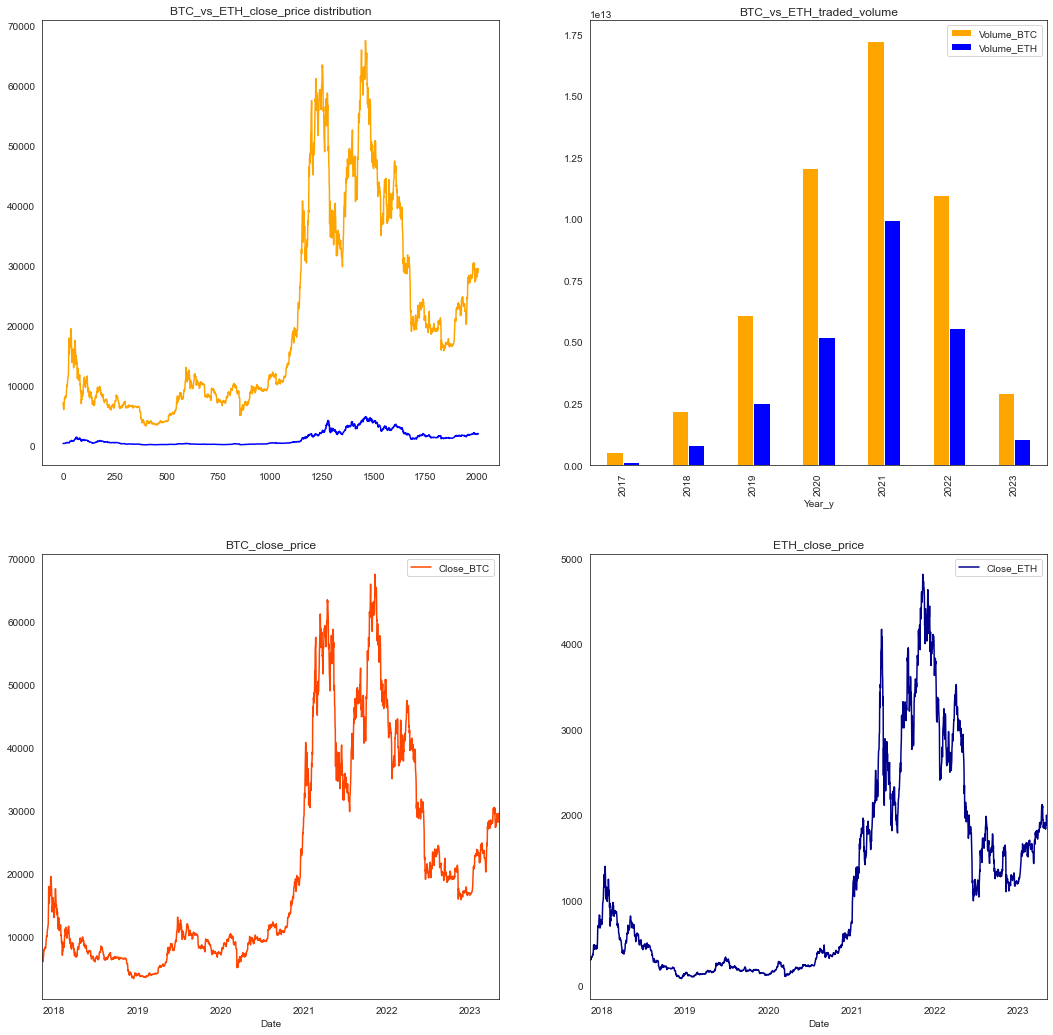

In [29]:
sns.set_style('white')
f, axes = plt.subplots(2,2, figsize=(18,18))
d1a=BTC_ETH['Close_BTC'].plot(kind='line', x='Date', label='Bitcoin', color='orange', \
                              title = 'BTC_vs_ETH_close_price distribution', ax=axes[0,0])
d1b=BTC_ETH['Close_ETH'].plot(kind='line', x='Date', label='Ethereum', color='blue', ax=axes[0,0] )
d2=BTC_ETH_gr_vol.plot(kind='bar', y=['Volume_BTC', 'Volume_ETH'], title = 'BTC_vs_ETH_traded_volume', \
                       color= ['orange', 'blue'], ax=axes[0,1])
d3=BTC_ETH.plot(x='Date', y='Close_BTC', color='orangered', title = 'BTC_close_price', ax=axes[1,0])
d4=ETH_data.plot(x='Date', y='Close_ETH', color='darkblue', title = 'ETH_close_price', ax=axes[1,1])

plt.show()

In [30]:
# the correllation between the close prices of BTC and ETH
BTC_ETH['Close_BTC'].corr(BTC_ETH['Close_ETH'])

0.9228843120579001

In [31]:
BTC_ETH[['Close_BTC', 'Close_ETH']].corr()

,Close_BTC,Close_ETH
Close_BTC,1.000000,0.922884
Close_ETH,0.922884,1.000000


The first chart shows close prices distributions of both cryptocurrencies - Bitcoin and Ethereum. It's obvious that currencies have different scale, but at the same time they have common trend and their changes are very similar. \
The similarity of both graphs is more obvious on third and forth visualizations (where we were able to level the difference in price scale) - we can observe, that general trend is the same, first rising to peak in the end of 2021, then - constant decline. Even drastic changes of price in 2021 and 2022 look almost the same. \
The correlation coefficient of 0.92 confirms that there is a strong positive correlation between the two variables.\
The second chart shows correspondence of both currencies' traded volumes with the same trend and only differences in their amounts.

---

## BTC and ETH in 2021

While significant changes for both currencies happened in 2021 year, let's observe them closer.

In [32]:
BTC_ETH2021 = BTC_ETH.loc[BTC_ETH['Year_y'] == 2021]
BTC_ETH2021.head(1)

,Date,Open_BTC,High_BTC,Low_BTC,Close_BTC,Volume_BTC,Dividends_BTC,Stock_Splits_BTC,day_perc_change_BTC,Open_ETH,High_ETH,Low_ETH,Close_ETH,Volume_ETH,Dividends_ETH,Stock_Splits_ETH,Year_y,day_perc_change_ETH
1149,2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,40730301359,0,0,1.284171,737.708374,749.201843,719.792236,730.367554,13652004358,0,0,2021,-1.007837


In [33]:
BTC_ETH2021[['Close_BTC', 'Close_ETH']].describe()

,Close_BTC,Close_ETH
count,365.000000,365.000000
mean,47436.932021,2778.354149
std,9787.634672,1023.543690
min,29374.152344,730.367554
25%,38347.062500,1895.552124
50%,47783.359375,2633.518311
75%,56216.183594,3638.122070
max,67566.828125,4812.087402


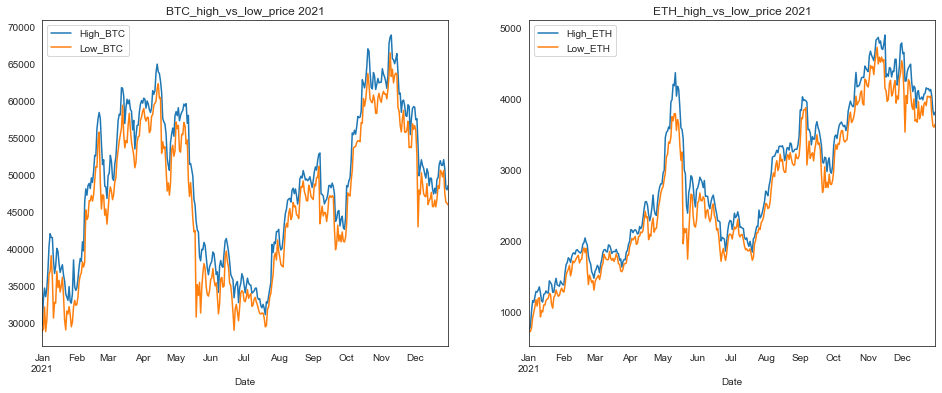

In [34]:
sns.set_style('white')
f, axes = plt.subplots(1,2, figsize=(16,6))

d1=BTC_ETH2021.plot(kind='line', x='Date', y=['High_BTC', 'Low_BTC'], title = 'BTC_high_vs_low_price 2021', ax=axes[0])
d2=BTC_ETH2021.plot(kind='line', x='Date', y=['High_ETH', 'Low_ETH'], title = 'ETH_high_vs_low_price 2021', ax=axes[1])

plt.show()

In [35]:
BTC_ETH2021['Close_BTC'].corr(BTC_ETH2021['Close_ETH'])

0.5532547178481071

In [36]:
BTC_ETH2021[['Close_BTC', 'Close_ETH']].corr()

,Close_BTC,Close_ETH
Close_BTC,1.000000,0.553255
Close_ETH,0.553255,1.000000


Both charts show changes of high and low prices of Bitcoin (BTC) and Ethereum (ETH) in 2021. \
While general trends for both currencies from 2017 to 2023 look similar and almost identical, in 2021 that's not the case.\
Bitcoin's trend - alternating ups and downs. Nevertheless, the values of the close price at the beginning (29374 USD) and the end (46306 USD) of the year indicate that growth did occur, although it is difficult to trace a clear trend.\
In the same time, Ethereum price trend also had its ups and downs, but they were less pronounced and its main growth line can still be traced. Peak maximum ETH close price in 2021 was 4812 USD. Ethereum cLose price values at the end of the year (3682 USD) compared to the values at the beginning of the year (730 USD) show an increase of 5 times, which clearly confirms the general upward trend.\
Less strong relationship between the BTC and ETH close prices in 2021 is confirmed by the value of the correlation coefficient=0.55, which indicates that variables can be considered moderately correlated that year.

Charts below demonstrate Bitcoin and Ethereum daily percentage changes on close price in 2021.

Comparing to BTC daily changes, Ethereum daily percentage changes on close price were more pronounced, more abrupt, especially in May and June, when a sharp price rise followed a sharp fall, and the price change was almost in 2 times on a short time period.

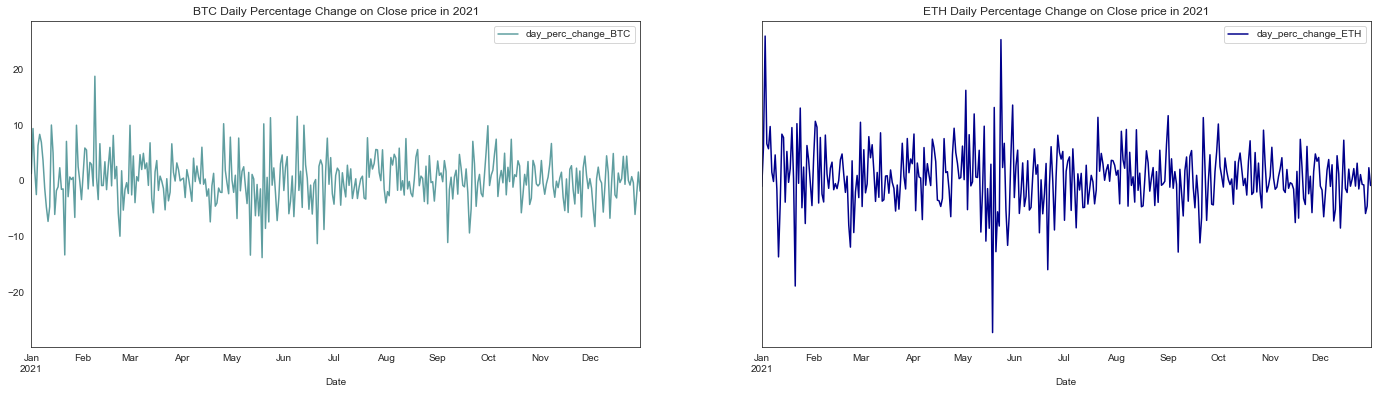

In [37]:
f, axes = plt.subplots(1,2, figsize=(24,6),  sharex=True, sharey=True)
d1=BTC_ETH2021.plot(x='Date', y='day_perc_change_BTC', title = 'BTC Daily Percentage Change on Close price in 2021',\
                    color='cadetblue', ax=axes[0])
d2=BTC_ETH2021.plot(x='Date', y='day_perc_change_ETH', title = 'ETH Daily Percentage Change on Close price in 2021',\
                    color='darkblue', ax=axes[1])
plt.show()